In [28]:
import os
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import sklearn.decomposition
import mdtraj
import random 
from ensemble_analysis_lib import *
from  plot import *
from functions import *
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go

## Comparison structural ensemble of the yeast Sic1 N-terminal targeting domain (1-90), phosphorylated (PED00161) with the nonphosphorylated one (PED00160)
### In this analysis, we aim to compare two structural ensembles of the yeast Sic1 N-terminal targeting domain. The first ensemble, designated as **PED00161**, represents the structural ensemble of the Sic1 N-terminal domain phosphorylated at residues Thr2, Thr5, Thr33, Thr45, Ser69, Ser76, and Ser80. This ensemble was generated using experimental data from Small-Angle X-ray Scattering (SAXS), Nuclear Magnetic Resonance (NMR) Paramagnetic Relaxation Enhancement (PRE) restraints, and validated through single-molecule Förster Resonance Energy Transfer (smFRET). The second ensemble, named **PED00160**, represents the structural ensemble of the same Sic1 N-terminal domain but in its non-phosphorylated form. This ensemble was defined using PRE restraints, chemical shift restraints, and validated through smFRET.

The main difference between these two ensembles lies in the presence or absence of phosphorylation at the specified residues. When the protein is phosphorylated, it indicates that some of its residues have been chemically modified by adding phosphate groups. This post-translational modification can significantly influence the protein's structure and function, regulating its biological activity and interactions with other cellular molecules. Therefore, comparing the structural ensembles of phosphorylated and non-phosphorylated Sic1 will allow us to better understand the impact of phosphorylation on the protein's structure, dynamics, as well as its interactions with other proteins and cellular molecules.

#### Alpha carbon

In [3]:
#Codes of the ensembles we want to analyze,corresponding PDB files.
ens_codes = ['PED00161_renum','PED00160_renum']
  
# Directory with the PDB files.
pdb_dp = "/Users/giuliabartocci/Desktop/AA/EXAMPLE/SIC1"

# Featurization options.
featurization = "ca_dist"  # choices: "ca_dist", "phi_psi", "sc_center_of_mass_dist" 
featurization_params = {"ca_dist": {"seq_sep": 2, "normalize": True},
                        "phi_psi": {},
                        "a_angle": {},
                        "sc_center_of_mass_dist":{}}

pipeline = EnsembleAnalysis(pdb_dp=pdb_dp,
                            ens_codes=ens_codes)

# Loading /Users/giuliabartocci/Desktop/AA/EXAMPLE/SIC1/PED00161_renum.dcd.
- Found 500 conformations.
# Loading /Users/giuliabartocci/Desktop/AA/EXAMPLE/SIC1/PED00160_renum.dcd.
- Found 500 conformations.


In [4]:
pipeline.featurize(featurization=featurization,
                   featurization_params=featurization_params[featurization])

# Featurizing the PED00161_renum ensemble.


- Featurized ensemble shape: (500, 4095)
# Featurizing the PED00160_renum ensemble.
- Featurized ensemble shape: (500, 4095)
Concatenated featurized ensemble shape: (1000, 4095)


In [5]:
trajectories= pipeline.trajectories
trajectories

{'PED00161_renum': <mdtraj.Trajectory with 500 frames, 1404 atoms, 92 residues, without unitcells at 0x131f419a0>,
 'PED00160_renum': <mdtraj.Trajectory with 500 frames, 1374 atoms, 92 residues, without unitcells at 0x131a6a120>}

### Distance matrix and visualization

In [7]:
ca_xyz_dict=dict_coord(trajectories)
distance_matrix_dict=calculate_distance_matrix_dict(ca_xyz_dict)
ca_xyz_dict['PED00160_renum'].shape

(500, 92, 3)

#### general view

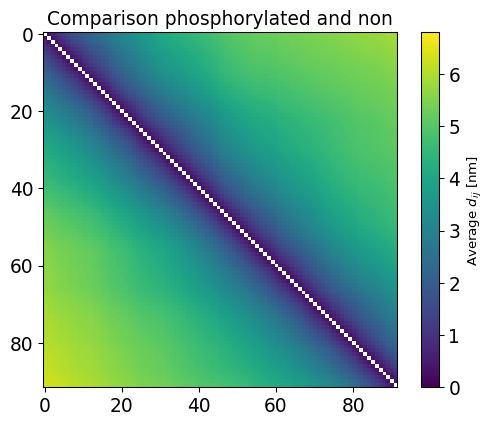

In [9]:
plot_average_dmap_comparison(distance_matrix_dict['PED00161_renum'],distance_matrix_dict['PED00160_renum'],'Comparison phosphorylated and non')

#### distribution of the phosph. residues


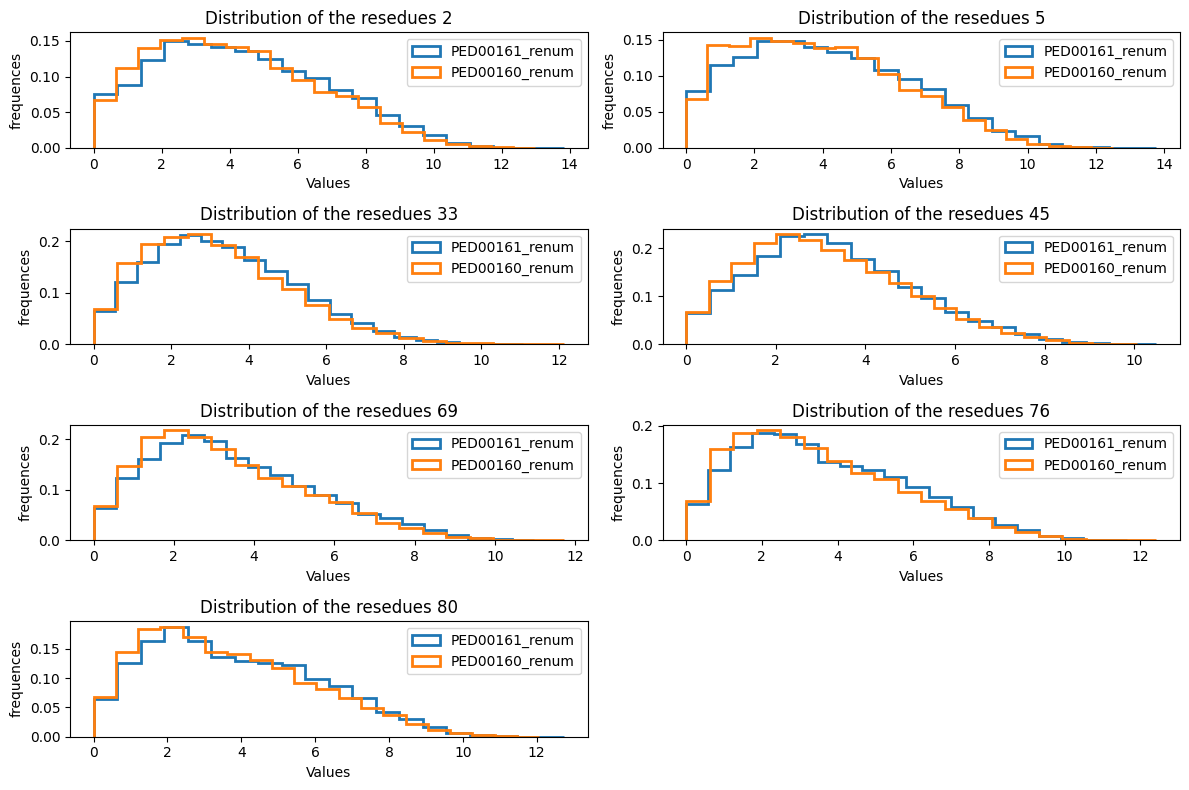

In [10]:
phosph_residues = [2, 5, 33, 45, 69, 76, 80]
num_row = (len(phosph_residues) + 1) // 2  
num_col = 2 
fig, axs = plt.subplots(num_row, num_col, figsize=(12, 8))
if num_row == 1 and num_col == 1:
    axs = np.array([[axs]])
for i, res in enumerate(phosph_residues):
    riga = i // num_col
    colonna = i % num_col
    ax = axs[riga, colonna]

    for prot, matrix in distance_matrix_dict.items():
        valori_colonna = matrix[:, :, res].flatten()  
        ax.hist(valori_colonna, bins=20, density=True, histtype='step', linewidth=2, label=prot)  
    ax.set_title(f"Distribution of the resedues {res}")
    ax.set_xlabel("Values")
    ax.set_ylabel("frequences")
    ax.legend()
for i in range(len(phosph_residues), num_row * num_col):
    riga = i // num_col
    colonna = i % num_col
    ax = axs[riga, colonna]
    ax.axis('off')
plt.tight_layout()
plt.show()


### Contact map

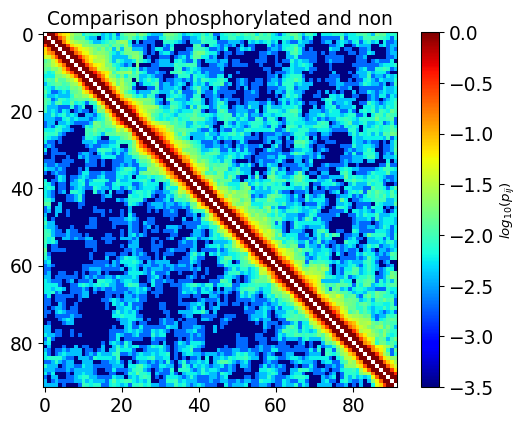

In [11]:
contact_map_dict=get_contact_map_dict(distance_matrix_dict)
plot_cmap_comparison(contact_map_dict['PED00161_renum'],contact_map_dict['PED00160_renum'],'Comparison phosphorylated and non')

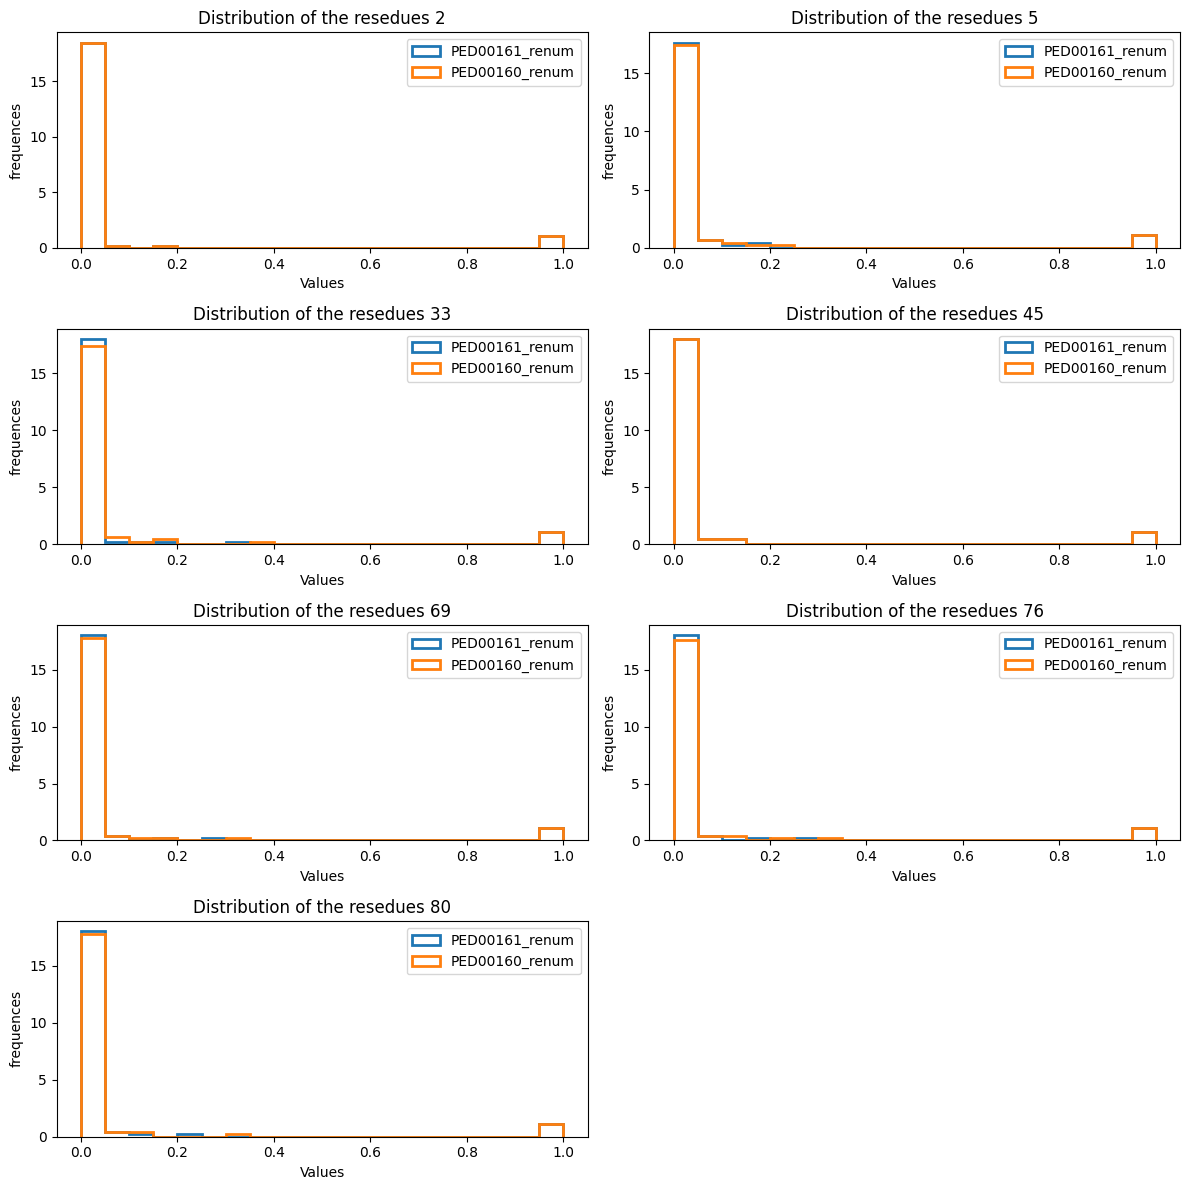

In [12]:
#specific view
num_row = (len(phosph_residues) + 1) // 2  
num_col = 2 
fig, axs = plt.subplots(num_row, num_col, figsize=(12, 12))
if num_row == 1 and num_col == 1:
    axs = np.array([[axs]])
for i, res in enumerate(phosph_residues):
    riga = i // num_col
    colonna = i % num_col
    ax = axs[riga, colonna]

    for prot, matrix in contact_map_dict.items():
        valori_colonna = matrix[:,res].flatten()  
        ax.hist(valori_colonna, bins=20, density=True, histtype='step', linewidth=2, label=prot)  
    ax.set_title(f"Distribution of the resedues {res}")
    ax.set_xlabel("Values")
    ax.set_ylabel("frequences")
    ax.legend()
for i in range(len(phosph_residues), num_row * num_col):
    riga = i // num_col
    colonna = i % num_col
    ax = axs[riga, colonna]
    ax.axis('off')
plt.tight_layout()
plt.show()



### Distribution

In [13]:
flattened_dict=flatten_matrices(distance_matrix_dict)

In [12]:
#plot_flattened_data(flattened_dict)

In [13]:
#plot_boxplot(flattened_dict)

# Angles analysis-Phi and Psi angles

In [14]:
#Codes of the ensembles we want to analyze,corresponding PDB files.
ens_codes = ['PED00161_renum','PED00160_renum']
  
# Directory with the PDB files.
pdb_dp = "/Users/giuliabartocci/Desktop/AA/EXAMPLE/SIC1"

# Featurization options.
featurization = "phi_psi"  # choices: "ca_dist", "phi_psi", "sc_center_of_mass_dist" 
featurization_params = {"ca_dist": {"seq_sep": 2, "normalize": True},
                        "phi_psi": {},
                        "a_angle": {},
                        "sc_center_of_mass_dist":{}}
pipeline = EnsembleAnalysis(pdb_dp=pdb_dp,
                            ens_codes=ens_codes)

# Loading /Users/giuliabartocci/Desktop/AA/EXAMPLE/SIC1/PED00161_renum.dcd.
- Found 500 conformations.
# Loading /Users/giuliabartocci/Desktop/AA/EXAMPLE/SIC1/PED00160_renum.dcd.
- Found 500 conformations.


In [15]:
trajectories_angles= pipeline.trajectories
trajectories_angles

{'PED00161_renum': <mdtraj.Trajectory with 500 frames, 1404 atoms, 92 residues, without unitcells at 0x132ab8d70>,
 'PED00160_renum': <mdtraj.Trajectory with 500 frames, 1374 atoms, 92 residues, without unitcells at 0x1322eed20>}

In [16]:
dict_phi_psi_splitted=featurize_and_split_phi_psi(trajectories_angles)

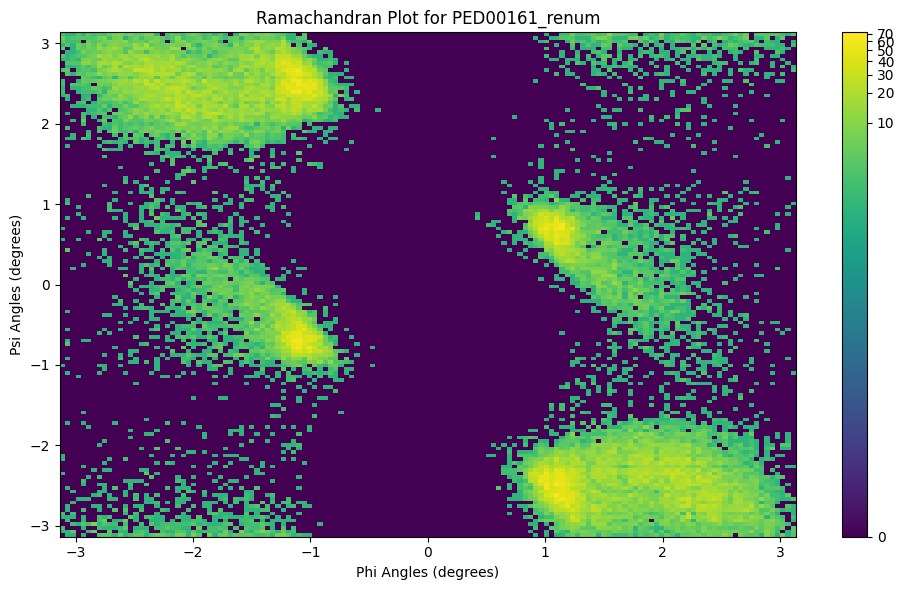

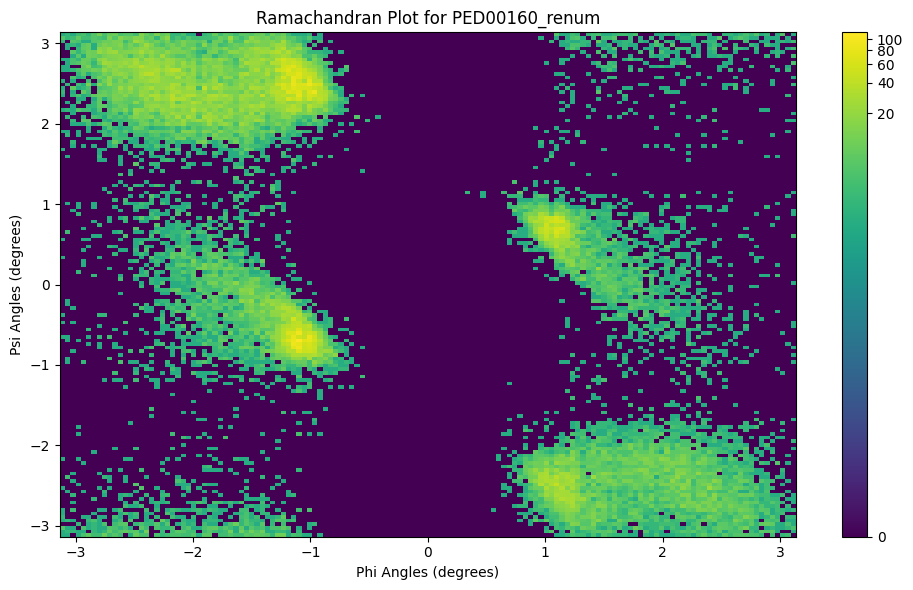

In [17]:
Ramachandran_plot_phi_psi(dict_phi_psi_splitted)

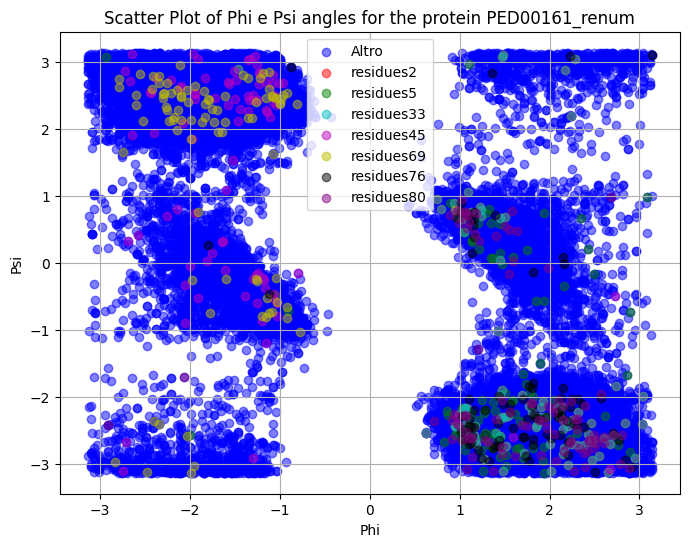

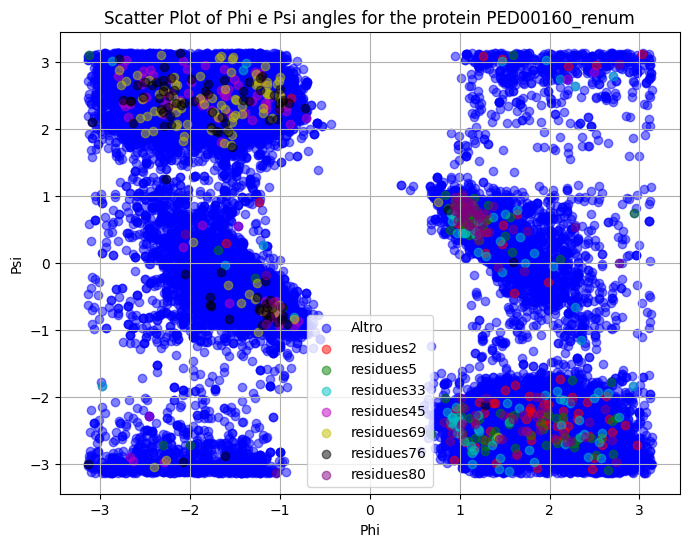

In [18]:
def scatter_plot_phi_psi(protein_phi_psi_dict):
    phosp_res = [2, 5, 33, 45, 69, 76, 80]
    colors = ['r', 'g', 'c', 'm', 'y', 'k', 'purple']  
    for protein_id, phi_psi_values in protein_phi_psi_dict.items():
        phi_values = phi_psi_values[0]
        psi_values = phi_psi_values[1]
        plt.figure(figsize=(8, 6))
        plt.scatter(phi_values, psi_values, c='b', marker='o', alpha=0.5, label='Altro')
        for i, res in enumerate(phosp_res):
            plt.scatter(phi_values[res], psi_values[res], c=colors[i], marker='o', alpha=0.5, label=f'residues{res}')
        plt.xlabel('Phi')
        plt.ylabel('Psi')
        plt.title(f'Scatter Plot of Phi e Psi angles for the protein {protein_id}')
        plt.grid(True)
        plt.legend()
        plt.show()
scatter_plot_phi_psi(dict_phi_psi_splitted)


In [19]:
#four_consecutive_indices_Calpha=consecutive_4_indices_of_Calpha(trajectories_angles)

In [20]:
#plot_distribution_dihedral_angles(trajectories_angles,four_consecutive_indices_Calpha)

## Global analysis
### Radius-of-gyration

In [21]:
#Codes of the ensembles we want to analyze,corresponding PDB files.
ens_codes = ['PED00161_renum','PED00160_renum']
  
# Directory with the PDB files.
pdb_dp = "/Users/giuliabartocci/Desktop/AA/EXAMPLE/SIC1"

# Featurization options.
featurization = "ca_dist"  # choices: "ca_dist", "phi_psi", "sc_center_of_mass_dist" 
featurization_params = {"ca_dist": {"seq_sep": 2, "normalize": True},
                        "phi_psi": {},
                        "a_angle": {},
                        "sc_center_of_mass_dist":{}}

pipeline = EnsembleAnalysis(pdb_dp=pdb_dp,
                            ens_codes=ens_codes)

# Loading /Users/giuliabartocci/Desktop/AA/EXAMPLE/SIC1/PED00161_renum.dcd.
- Found 500 conformations.
# Loading /Users/giuliabartocci/Desktop/AA/EXAMPLE/SIC1/PED00160_renum.dcd.
- Found 500 conformations.


In [22]:
trajectories= pipeline.trajectories
Rgs_dict=rg_calculator_dict(trajectories)

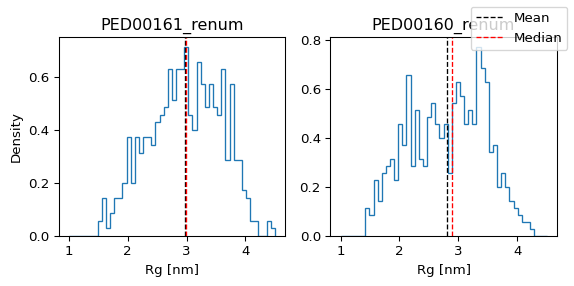

In [23]:
plot_rg_comparison(Rgs_dict)

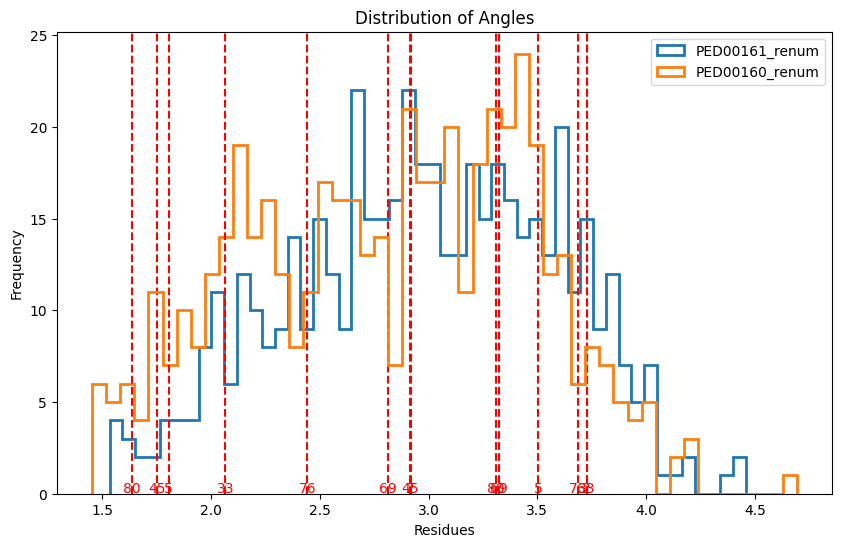

In [24]:
#plot_distribution_of_Rgs(Rgs_dict)
def plot_distribution_of_Rgs(angle_dict):
    highlighted_residues = [2, 5, 33, 45, 69, 76, 80]
    plt.figure(figsize=(10, 6))
    for traj_id, angles in angle_dict.items():
        plt.hist(angles, bins=50, histtype='step', linewidth=2, label=traj_id)
        for residue in highlighted_residues:
            plt.axvline(angles[residue],  color='r', linestyle='--')  
            plt.text(angles[residue], 0.05, str(residue), color='r', ha='center')  
    plt.xlabel('Residues')
    plt.ylabel('Frequency')
    plt.title('Distribution of Angles')
    plt.legend()
    plt.show()
plot_distribution_of_Rgs(Rgs_dict)

### Alpha-helix content

In [25]:
dssp_dict=get_dssp_dict(trajectories)

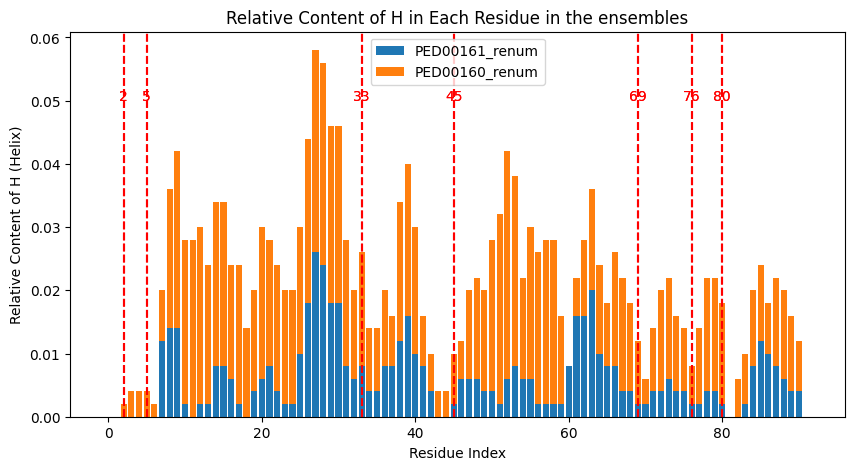

In [26]:
#plot_relative_helix_content_multiple_proteins(dssp_dict)
def plot_relative_helix_content_multiple_proteins(protein_dssp_data_dict):
    fig, ax = plt.subplots(figsize=(10, 5))
    bottom = np.zeros(next(iter(protein_dssp_data_dict.values())).shape[1])
    highlighted_residues = [2, 5, 33, 45, 69, 76, 80]
    for protein_name, dssp_data in protein_dssp_data_dict.items():
        h_counts = np.count_nonzero(dssp_data == 'H', axis=0)
        total_residues = dssp_data.shape[0]
        relative_h_content = h_counts / total_residues
        bars = ax.bar(range(len(relative_h_content)), relative_h_content, bottom=bottom, label=protein_name)
        for residue in highlighted_residues:
            plt.axvline(residue, color='r', linestyle='--') 
            ax.text(residue, 0.05, str(residue), color='r', ha='center') 
        bottom += relative_h_content
    ax.set_xlabel('Residue Index')
    ax.set_ylabel('Relative Content of H (Helix)')
    ax.set_title('Relative Content of H in Each Residue in the ensembles')
    ax.legend()
    plt.show()
plot_relative_helix_content_multiple_proteins(dssp_dict)

### Site specific order

In [29]:
def plot_o_i(dict_o_i):
    fig = go.Figure()
    for key, o_i in dict_o_i.items():
        position = list(range(o_i.shape[0])) 
        trace = go.Scatter(x=position, y=o_i, mode='markers', name=key)
        fig.add_trace(trace)
    layout = go.Layout(
        title='Site-specific order parameter',
        xaxis=dict(title='Position'),
        yaxis=dict(title='Value', range=[0.18, 0.23]),
        width=1000,
        height=600
    )
    fig.update_layout(layout)
    fig.add_shape(type="line", x0=0, y0=0.1906, x1=len(position), y1=0.1906, line=dict(color="black", width=2))
    
    for key, _ in dict_o_i.items():
        highlighted_residues = [2, 5, 33, 45, 69, 76, 80]
        for residue in highlighted_residues:
            fig.add_shape(type="line", x0=residue, y0=0,x1=residue, y1=0.23,line=dict(color="red", width=1, dash="dash"))
    fig.show()
dict_o_i = site_specific_order_parameter(ca_xyz_dict)
plot_o_i(dict_o_i)


#### Site specific flexibility

In [30]:
def featurize_phi_psi_dict(traj_dict, get_names=False):
    featurized_traj_dict = {}
    for traj_key, traj in traj_dict.items():
        atoms = list(traj.topology.atoms)
        phi_ids, phi = mdtraj.compute_phi(traj)
        psi_ids, psi = mdtraj.compute_psi(traj)
        phi_psi = np.concatenate([phi, psi], axis=1)
        if get_names:
            names = []
            for t in phi_ids:
                names.append(repr(atoms[t[1]].residue) + "-PHI")
            for t in psi_ids:
                names.append(repr(atoms[t[0]].residue) + "-PSI")
            featurized_traj_dict[traj_key] = (phi_psi, names)
        else:
            featurized_traj_dict[traj_key] = phi_psi
    return featurized_traj_dict
def split_phipsi_and_delate_lastphi_fristpsi_data(dictionary):
    phi_psi_separated = {}
    for key, value in dictionary.items():
        split_index = value.shape[1] // 2
        phi_array, psi_array = np.split(value, [split_index], axis=1)
        array_phi = np.delete(phi_array, -1, axis=1)
        array_psi = np.delete(psi_array, 0, axis=1)
        phi_psi_separated[key] = [array_phi, array_psi]
    return phi_psi_separated
phi_psi_separated = split_phipsi_and_delate_lastphi_fristpsi_data(featurize_phi_psi_dict(trajectories_angles))
def specific_site_flexibility_parameter(phi_psi_separated):
    f = {}
    for key, (phi_array, psi_array) in phi_psi_separated.items():
        Rsquare_phi =  np.square(np.mean(np.cos(phi_array), axis=0)) + np.square(np.mean(np.sin(phi_array), axis=0))
        Rsquare_psi = np.square(np.mean(np.cos(psi_array), axis=0)) + np.square(np.mean(np.sin(psi_array), axis=0))
        f_i = np.round(1 - (1/2 * np.sqrt(Rsquare_phi)) - (1/2 * np.sqrt(Rsquare_psi)), 5)
        f[key] = f_i
    return f
flexibility_parameter=specific_site_flexibility_parameter(phi_psi_separated)
def plot_scatter(flexibility_paramet):
    fig = go.Figure()
    for key, val in flexibility_paramet.items():
        position = list(range(val.shape[0])) 
        trace = go.Scatter(x=position, y=val, mode='markers', name=key)
        fig.add_trace(trace)
    
    layout = go.Layout(
        title='Site-specific flexiblity parameter',
        xaxis=dict(title='Position'),
        yaxis=dict(title='Value',range=[0.4,1]),
        width=1000,
        height=600
    )
    fig.update_layout(layout)
    highlighted_residues = [2, 5, 33, 45, 69, 76, 80]
    for residue in highlighted_residues:
        fig.add_shape(type="line", x0=residue, y0=0, x1=residue,y1=1, line=dict(color="red", width=1, dash="dash"))
    fig.show()
plot_scatter(flexibility_parameter)